The dataset reviewed contains data from 2126 measurements extracted from cardiotocographs and graded by experienced obstetricians, as described in: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318.

Cardiotocography (CTG) is a simple and cost-effective option for assessing the health of the fetus, allowing health professionals to intervene to prevent infant and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

- baseline value FHR baseline (beats per minute)
- accelerations Number of accelerations per second
- fetal_movement Number of fetal movements per second
- uterine_contractions Number of uterine contractions per second
- light_decelerations Number of light decelerations per second
- severe_decelerations Number of severe decelerations per second
- prolongued_decelerations Number of prolonged decelerations per second
- abnormal_short_term_variability Percentage of time with abnormal short-term - variability
- mean_value_of_short_term_variability Average value of short-term variability
- percentage_of_time_with_abnormal_long_term_variability Percentage of time with abnormal long term variability
- mean_value_of_long_term_variability Average value of long-term variability
- histogram_width Width of the FHR histogram.
- histogram_min Minimum (low frequency) of the FHR histogram
- histogram_max Maximum (high frequency) of the FHR histogram
- histogram_number_of_peaks Number of histogram peaks
- histogram_number_of_zeroes Number of zeros of the histogram
- histogram_mode Fashion of the histogram
- histogram_mean Mean of the histogram
- histogram_median Median of the histogram
- histogram_variance Variance of the histogram
- histogram_tendency Tendency of the histogram
- Target: fetal_health Marked as 1 (Normal), 2 (Suspicious) and 3 (Pathological)

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('fetal_health.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


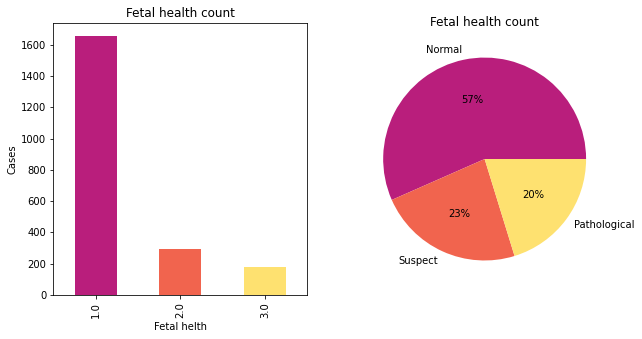

In [ ]:
total = df["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(df["fetal_health"].value_counts())

plt.figure(figsize = (14,8))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = df.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#B91E7C", "#F1644E", "#FEE170"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state")

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#B91E7C", "#F1644E", "#FEE170"], autopct="%1.0f%%")
plt.title("Fetal health count")


plt.show()

In [ ]:
# Pearson
dfCorMatrix = df.corr()
dfCorMatrix

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


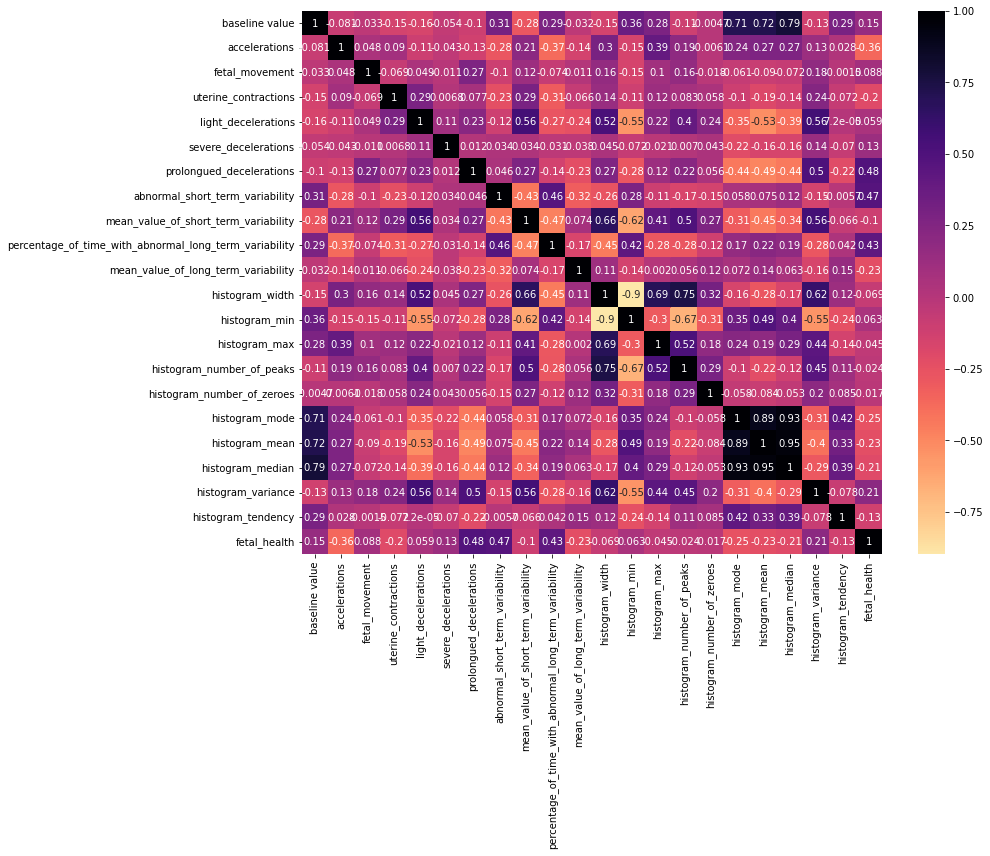

In [ ]:
plt.figure(figsize=(13,10))
sb.heatmap(dfCorMatrix,annot=True,center=0, cmap = "magma_r")
plt.show()

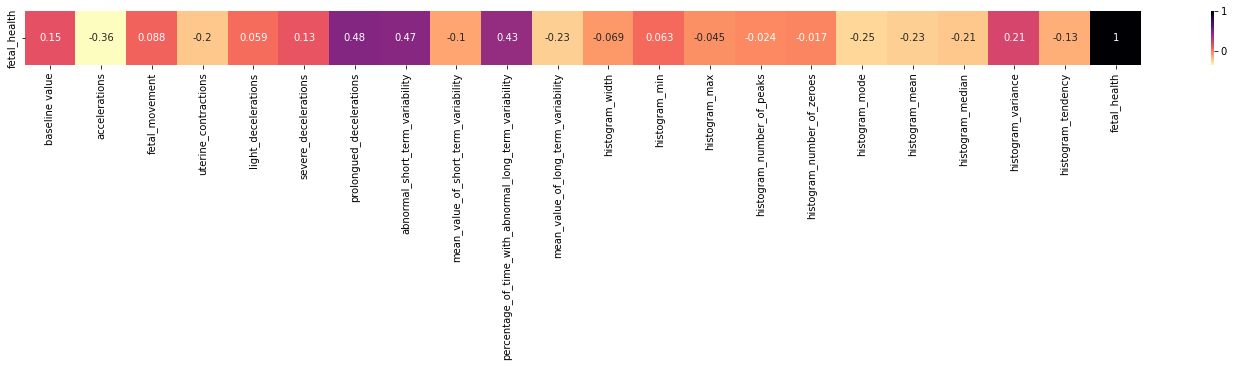

In [ ]:
plt.subplots(figsize=(25,1))
sb.heatmap(dfCorMatrix.sort_values(by=["fetal_health"], ascending=False).head(1),annot=True, cmap="magma_r")
plt.show()

In [ ]:
x=dfCorMatrix["fetal_health"].sort_values(ascending=False).head(22).to_frame()
x.style.background_gradient(cmap="magma_r")

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


In [ ]:
# spearman
dfCorMatrix_Sp = df.corr(method='spearman')
dfCorMatrix_Sp

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.113491,-0.022443,-0.134082,-0.174392,-0.059748,-0.140979,0.317172,-0.367277,0.340119,...,0.358085,0.326142,-0.120950,-0.065351,0.818167,0.788162,0.840533,-0.239164,0.286292,0.221300
accelerations,-0.113491,1.000000,0.052193,0.120315,-0.011841,-0.050695,-0.116469,-0.344233,0.326810,-0.490785,...,-0.167166,0.469824,0.237827,0.001130,0.187285,0.210268,0.209460,0.391358,-0.023614,-0.455529
fetal_movement,-0.022443,0.052193,1.000000,-0.310444,0.034921,0.001492,0.123250,0.260450,0.070504,-0.074772,...,-0.179806,0.116280,0.192604,-0.093228,-0.035364,-0.080297,-0.041463,0.114704,0.003121,0.114258
uterine_contractions,-0.134082,0.120315,-0.310444,1.000000,0.303453,0.005984,0.126033,-0.217574,0.327456,-0.282525,...,-0.103619,0.112675,0.118479,0.060596,-0.088579,-0.170962,-0.135001,0.277393,-0.080493,-0.256053
light_decelerations,-0.174392,-0.011841,0.034921,0.303453,1.000000,0.062369,0.326796,-0.153196,0.617292,-0.385298,...,-0.602113,0.232907,0.481992,0.276441,-0.251759,-0.469824,-0.329598,0.712976,0.069962,-0.046203
severe_decelerations,-0.059748,-0.050695,0.001492,0.005984,0.062369,1.000000,0.038860,0.041187,0.052496,-0.046340,...,-0.074427,-0.021517,0.016096,0.062382,-0.097516,-0.091304,-0.087004,0.091692,-0.054449,0.103666
prolongued_decelerations,-0.140979,-0.116469,0.123250,0.126033,0.326796,0.038860,1.000000,0.030340,0.300556,-0.218539,...,-0.310456,0.105402,0.241082,0.080453,-0.311446,-0.404517,-0.358421,0.380058,-0.173689,0.341253
abnormal_short_term_variability,0.317172,-0.344233,0.260450,-0.217574,-0.153196,0.041187,0.030340,1.000000,-0.520559,0.425070,...,0.269465,-0.126172,-0.165619,-0.174236,0.125607,0.136638,0.163534,-0.344503,0.001188,0.499944
mean_value_of_short_term_variability,-0.367277,0.326810,0.070504,0.327456,0.617292,0.052496,0.300556,-0.520559,1.000000,-0.685163,...,-0.695384,0.372445,0.551783,0.296415,-0.313352,-0.459636,-0.358651,0.778604,-0.042132,-0.294835
percentage_of_time_with_abnormal_long_term_variability,0.340119,-0.490785,-0.074772,-0.282525,-0.385298,-0.046340,-0.218539,0.425070,-0.685163,1.000000,...,0.465303,-0.320871,-0.358528,-0.165206,0.222235,0.291717,0.245170,-0.650024,0.073752,0.386966


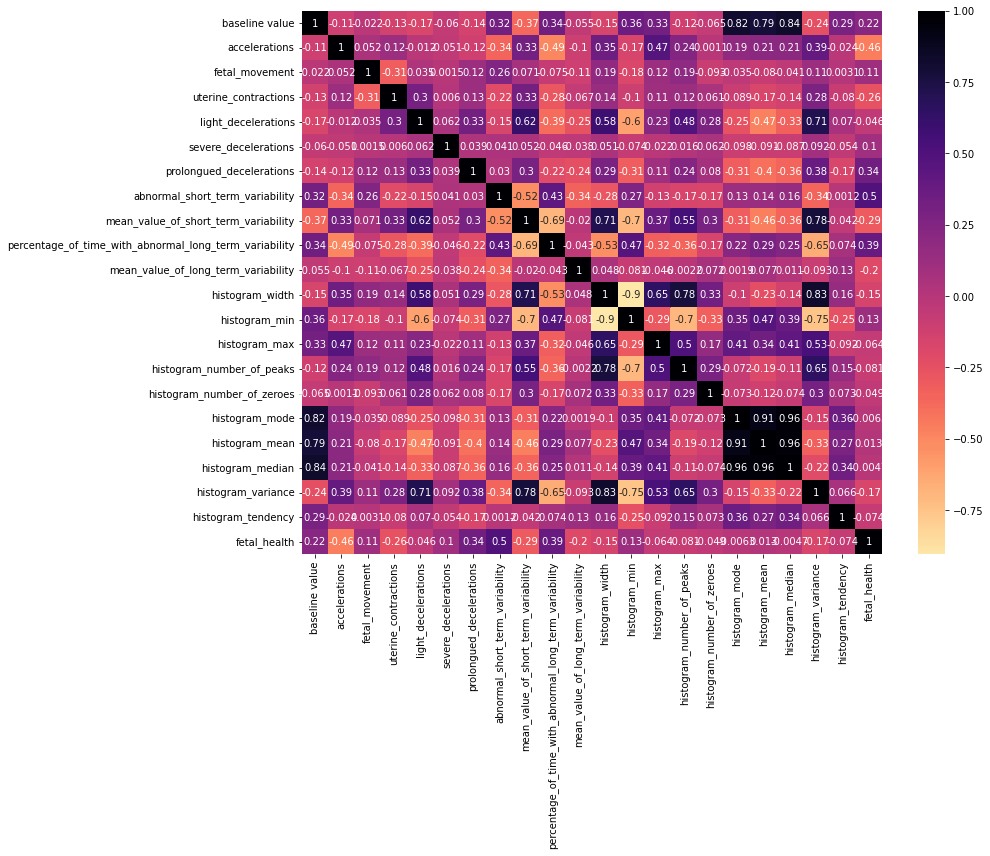

In [ ]:
plt.figure(figsize=(13,10))
sb.heatmap(dfCorMatrix_Sp,annot=True,center=0, cmap = "magma_r")
plt.show()

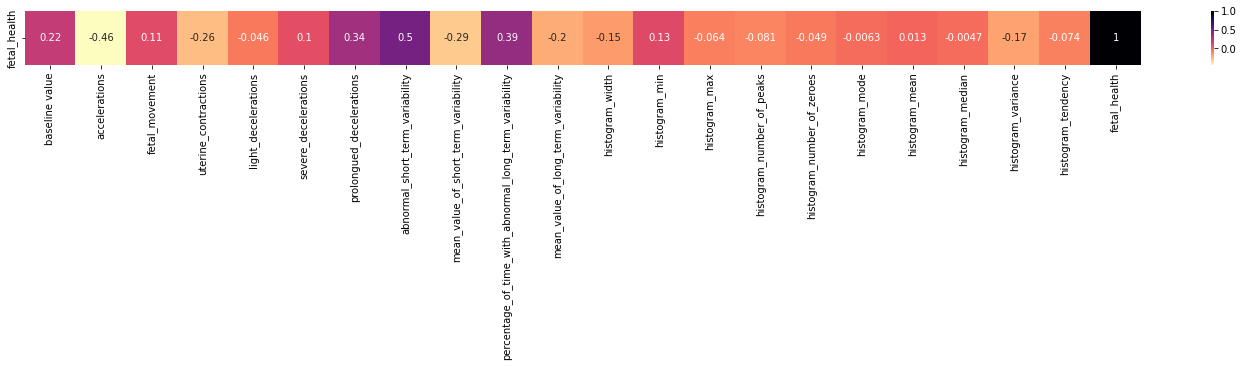

In [ ]:
plt.subplots(figsize=(25,1))
sb.heatmap(dfCorMatrix_Sp.sort_values(by=["fetal_health"], ascending=False).head(1),annot=True, cmap="magma_r")
plt.show()

In [ ]:
x=dfCorMatrix_Sp["fetal_health"].sort_values(ascending=False).head(22).to_frame()
x.style.background_gradient(cmap="magma_r")

,fetal_health
fetal_health,1.000000
abnormal_short_term_variability,0.499944
percentage_of_time_with_abnormal_long_term_variability,0.386966
prolongued_decelerations,0.341253
baseline value,0.221300
histogram_min,0.125267
fetal_movement,0.114258
severe_decelerations,0.103666
histogram_mean,0.013465
histogram_median,-0.004659


In [ ]:
# kendall
dfCorMatrix_K = df.corr(method='kendall')
dfCorMatrix_K

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.081494,-0.017103,-0.096757,-0.133333,-0.049579,-0.114086,0.218882,-0.253888,0.255966,...,0.254113,0.228369,-0.088556,-0.052905,0.663022,0.622946,0.681247,-0.164029,0.232253,0.179959
accelerations,-0.081494,1.000000,0.041677,0.090228,-0.012083,-0.044687,-0.101670,-0.248855,0.245556,-0.403934,...,-0.121236,0.349252,0.180939,0.000882,0.138302,0.159157,0.157403,0.294778,-0.019408,-0.391716
fetal_movement,-0.017103,0.041677,1.000000,-0.239778,0.030310,0.001367,0.111191,0.197517,0.054353,-0.061096,...,-0.138640,0.088346,0.153873,-0.083477,-0.027572,-0.061018,-0.031992,0.087220,0.002641,0.101204
uterine_contractions,-0.096757,0.090228,-0.239778,1.000000,0.239587,0.005132,0.106832,-0.157165,0.238729,-0.221260,...,-0.075509,0.079404,0.087187,0.050889,-0.063262,-0.121191,-0.096448,0.202862,-0.067042,-0.215862
light_decelerations,-0.133333,-0.012083,0.030310,0.239587,1.000000,0.056905,0.292839,-0.117230,0.481831,-0.319349,...,-0.472208,0.177388,0.381583,0.245043,-0.190882,-0.360117,-0.249534,0.569344,0.062410,-0.042466
severe_decelerations,-0.049579,-0.044687,0.001367,0.005132,0.056905,1.000000,0.038329,0.033924,0.043731,-0.041837,...,-0.061152,-0.017725,0.013831,0.060891,-0.080642,-0.075288,-0.071778,0.076456,-0.052852,0.101115
prolongued_decelerations,-0.114086,-0.101670,0.111191,0.106832,0.292839,0.038329,1.000000,0.023835,0.248117,-0.194589,...,-0.253493,0.085584,0.204874,0.077467,-0.255544,-0.331553,-0.294204,0.314689,-0.166854,0.327767
abnormal_short_term_variability,0.218882,-0.248855,0.197517,-0.157165,-0.117230,0.033924,0.023835,1.000000,-0.418359,0.325039,...,0.184234,-0.092532,-0.117278,-0.140507,0.087994,0.101116,0.117913,-0.240967,0.002540,0.405491
mean_value_of_short_term_variability,-0.253888,0.245556,0.054353,0.238729,0.481831,0.043731,0.248117,-0.418359,1.000000,-0.543078,...,-0.517864,0.262656,0.410173,0.242036,-0.214445,-0.323279,-0.248804,0.606054,-0.033798,-0.252519
percentage_of_time_with_abnormal_long_term_variability,0.255966,-0.403934,-0.061096,-0.221260,-0.319349,-0.041837,-0.194589,0.325039,-0.543078,1.000000,...,0.350424,-0.242087,-0.277821,-0.145961,0.167661,0.219250,0.184590,-0.516692,0.064859,0.350692


In [ ]:
x=dfCorMatrix_K["fetal_health"].sort_values(ascending=False).head(22).to_frame()
x.style.background_gradient(cmap="magma_r")

,fetal_health
fetal_health,1.000000
abnormal_short_term_variability,0.405491
percentage_of_time_with_abnormal_long_term_variability,0.350692
prolongued_decelerations,0.327767
baseline value,0.179959
histogram_min,0.105006
fetal_movement,0.101204
severe_decelerations,0.101115
histogram_mean,0.018605
histogram_median,0.003314


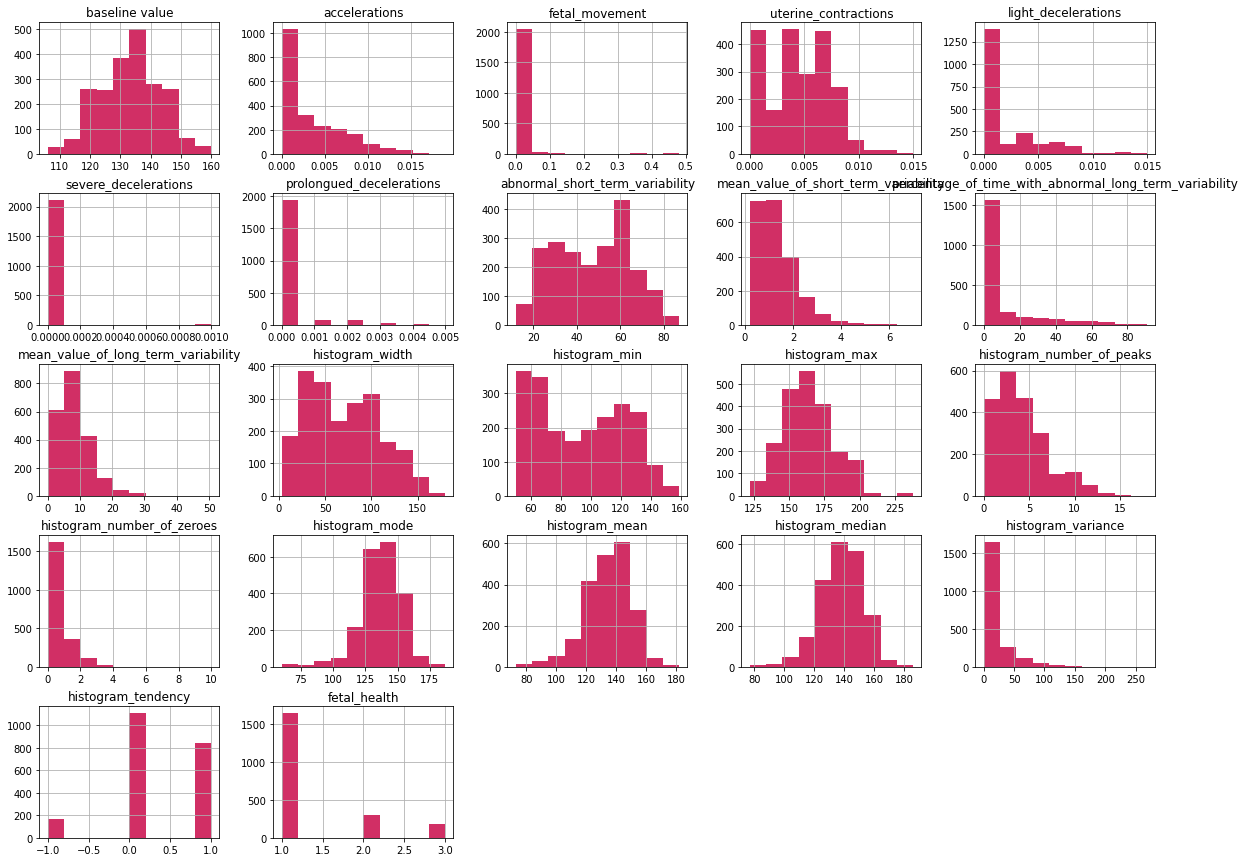

In [ ]:
df.hist(figsize=(20,15),color='#d12f65')
plt.show()

In [ ]:
# teniamo solo le variabili con correlazione alta con fetal health

df2=df[['fetal_health','accelerations','percentage_of_time_with_abnormal_long_term_variability','prolongued_decelerations','abnormal_short_term_variability']]

df4=df[['accelerations','percentage_of_time_with_abnormal_long_term_variability','prolongued_decelerations','abnormal_short_term_variability']]

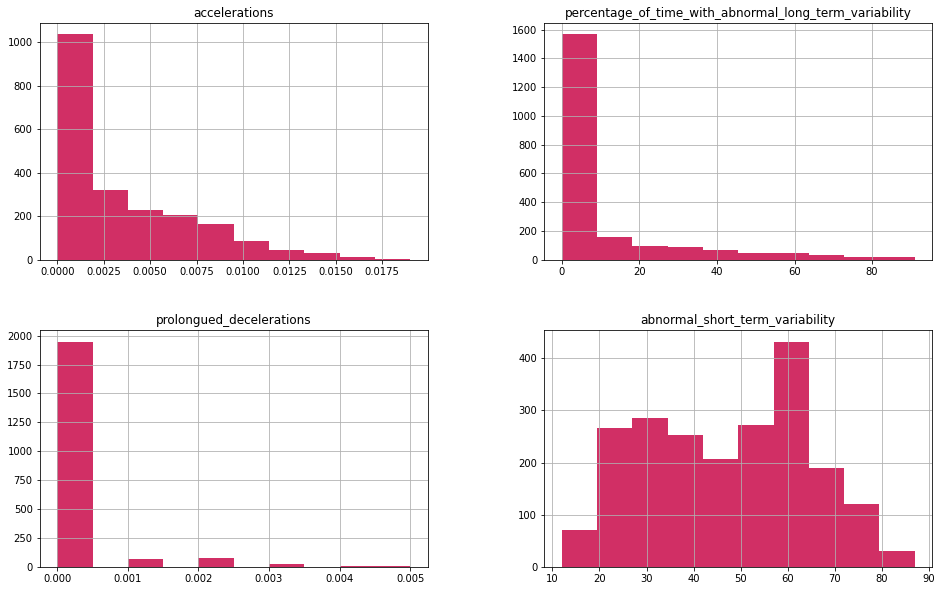

In [ ]:
df4.hist(figsize=(16,10),color='#d12f65')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


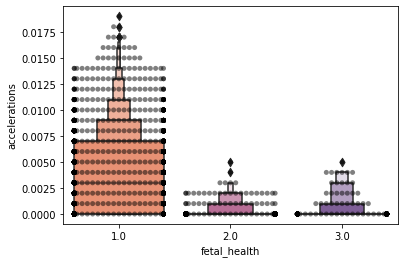

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


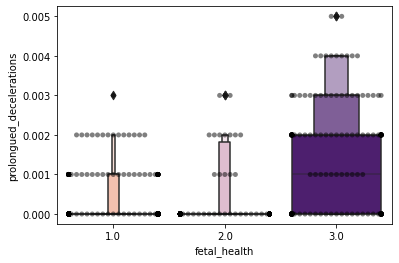

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


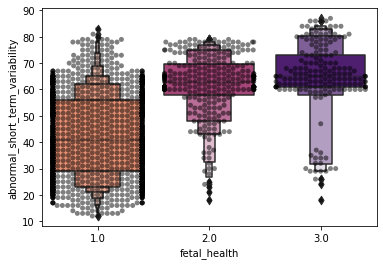

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


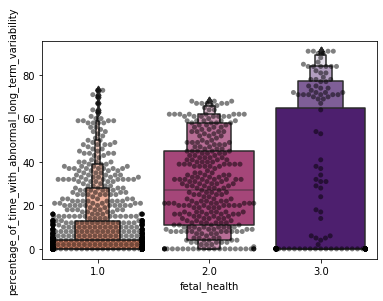

In [ ]:
cols=['accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']

for i in cols:
    sb.swarmplot(x=df["fetal_health"], y=df[i], color="black", alpha=0.5 )
    sb.boxenplot(x=df["fetal_health"], y=df[i], palette='magma_r')
    plt.show()

**CLUSTERING**

K MEANS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df_clust=df[['accelerations','percentage_of_time_with_abnormal_long_term_variability','prolongued_decelerations','abnormal_short_term_variability']]

In [ ]:
scaler = StandardScaler()
df_scal = scaler.fit_transform(df_clust)

STANDARDIZZAZIONE dati

In [ ]:
# DATI STANDARDIZZATI

sse_list = list()
max_k = 20
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_scal)

    sse = kmeans.inertia_
    sse_list.append(sse)

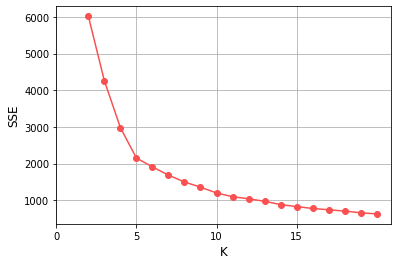

In [ ]:
plt.plot(range(2, len(sse_list) + 2), sse_list, marker='o', color='#F95151')
plt.ylabel('SSE', fontsize=12)
plt.xlabel('K', fontsize=12)
plt.xticks(np.arange(0, 20, 5))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid()
plt.show()

In [ ]:
# DATI NON STANDARDIZZATI

sse_list2 = list()
max_k = 20
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_clust)

    sse = kmeans.inertia_
    sse_list2.append(sse)

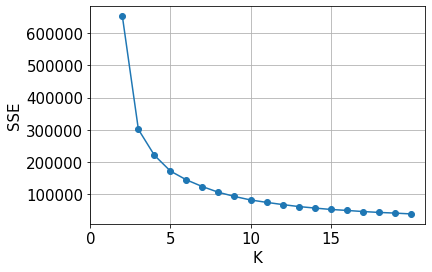

In [ ]:
plt.plot(range(2, len(sse_list2) + 2), sse_list2, marker='o')
plt.ylabel('SSE', fontsize=15)
plt.xlabel('K', fontsize=15)
plt.xticks(np.arange(0, 20, 5))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

In [ ]:
# SILHOUETTE

sil_list = list()
max_k = 20
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=100, max_iter=1000)
    kmeans.fit(df_scal)
    sil_list.append(silhouette_score(df_scal, kmeans.labels_))

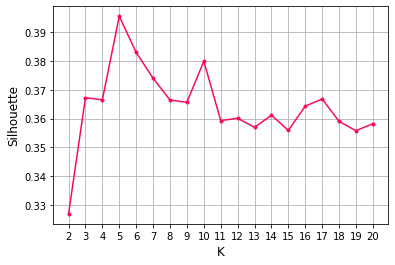

In [ ]:
plt.plot(range(2, max_k + 1), sil_list, marker='.',color='#F70963')
plt.xticks(range(2, max_k + 1), fontsize=10)
plt.ylabel('Silhouette', fontsize=12)
plt.xlabel('K', fontsize=12)
plt.grid()
plt.show()

In [ ]:
print('Silhouette %s' % silhouette_score(df_scal, kmeans.labels_))

Silhouette 0.3582280473973661


In [ ]:
kmeans5 = KMeans(n_clusters=5, n_init=10, max_iter=100)
kmeans5.fit(df_scal)

KMeans(max_iter=100, n_clusters=5)

In [ ]:
kmeans5.cluster_centers_

array([[-0.58519758, -0.50213527,  3.92281153,  0.27314712],
       [ 1.55132338, -0.51101997, -0.26166031, -0.31648065],
       [-0.26536103, -0.37487412, -0.16244702, -1.02744644],
       [-0.76706272,  2.1688225 , -0.2687543 ,  1.04585629],
       [-0.456172  , -0.20790258, -0.18867535,  0.72135055]])

In [ ]:
# misuro la grandezza di ogni cluster (5)

hist, bins = np.histogram(kmeans5.labels_, bins=range(0, len(set(kmeans5.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(df_scal)))

Cluster 0: 108 (0.05)
Cluster 1: 478 (0.22)
Cluster 2: 622 (0.29)
Cluster 3: 304 (0.14)
Cluster 4: 614 (0.29)


In [ ]:
pd.crosstab(df['fetal_health'], kmeans5.labels_)

col_0,0,1,2,3,4
fetal_health,,,,,
1.0,15,478,604,101,457
2.0,10,0,16,147,122
3.0,83,0,2,56,35


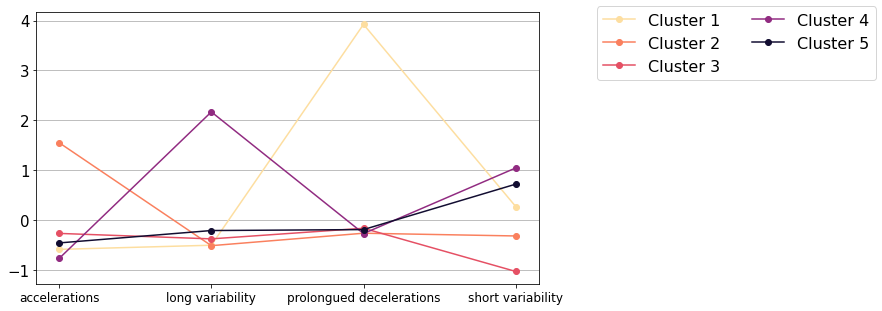

In [ ]:

centers = kmeans5.cluster_centers_
col=['accelerations','long variability','prolongued decelerations','short variability']
clust_name=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
colors = ['#fddea0', '#fa805e', '#e55064', '#912b81', '#120d31']

plt.figure(figsize=(9, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i], color = colors[i])
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(col)), col, fontsize=12)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.legend(fontsize=16, ncol=2, bbox_to_anchor=(1.1, 1.05))
plt.show()

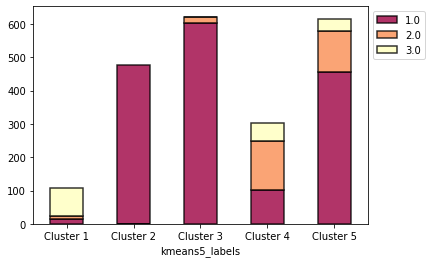

In [ ]:
colors = plt.cm.Spectral(np.linspace(0, 0.5, 3))
df['kmeans5_labels'] = kmeans5.labels_  #ogni punto associato l'id del cluster in una nuova colonna
bar_pl = df['fetal_health'].groupby(df['kmeans5_labels']).value_counts().unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', color = colors,linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans3.fit(df_scal)

KMeans(max_iter=100, n_clusters=3)

In [ ]:
kmeans3.cluster_centers_

array([[-0.58519758, -0.50213527,  3.92281153,  0.27314712],
       [-0.70340941,  0.81335441, -0.20844132,  0.89692238],
       [ 0.47425662, -0.44726401, -0.21084724, -0.56414931]])

In [ ]:
hist, bins = np.histogram(kmeans3.labels_, bins=range(0, len(set(kmeans3.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(df_scal)))

Cluster 0: 108 (0.05)
Cluster 1: 754 (0.35)
Cluster 2: 1264 (0.59)


In [ ]:
pd.crosstab(df['fetal_health'], kmeans3.labels_)

col_0,0,1,2
fetal_health,,,
1.0,15,400,1240
2.0,10,263,22
3.0,83,91,2


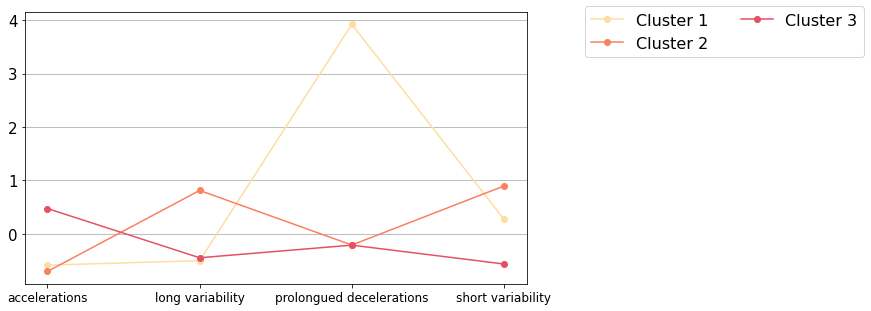

In [ ]:
centers3 = kmeans3.cluster_centers_
clust_name3=['Cluster 1', 'Cluster 2', 'Cluster 3']
colors = ['#fddea0', '#fa805e', '#e55064', '#912b81', '#120d31']

plt.figure(figsize=(9, 5))
for i in range(0, len(centers3)):
    plt.plot(centers3[i], marker='o', label=clust_name3[i], color = colors[i])
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(col)), col, fontsize=12)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.legend(fontsize=16, ncol=2, bbox_to_anchor=(1.1, 1.05))
plt.show()

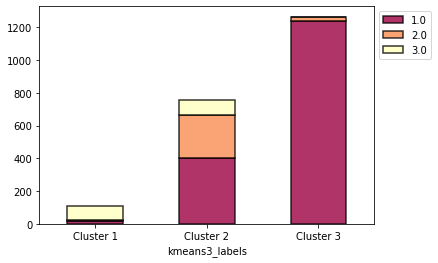

In [ ]:
colors = plt.cm.Spectral(np.linspace(0, 0.5, 3))
df['kmeans3_labels'] = kmeans3.labels_
bar_pl = df['fetal_health'].groupby(df['kmeans3_labels']).value_counts().unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', color = colors, linewidth=1.5)

plt.xticks(range(0, len(clust_name3)), clust_name3, fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()
plt.show()

In [ ]:
!pip install pyclustering

     |████████████████████████████████| 2.6 MB 29.9 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=91d45186b05aa4a5e26923e1310bc817b0d1275ed50d70127f5b0a2cce8e3136
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
from pyclustering.cluster.xmeans import xmeans

20


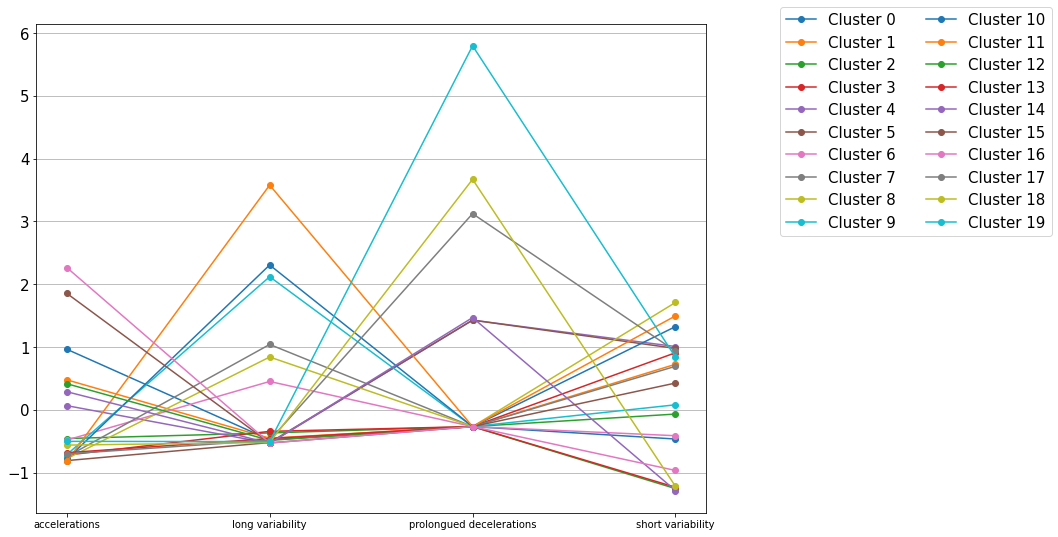

In [ ]:
xm = xmeans(df_scal)
xm.process()

clusters = xm.get_clusters()
centersx = xm.get_centers()
print(len(clusters))

# plot delle coordinate parallele:
# x: variabili, y: valori dei centroidi

plt.figure(figsize=(12,9))

for i in range(0, len(centersx)):
    plt.plot(centersx[i], marker='o', label='Cluster %s' % i)

plt.xticks(range(0, len(col)), col, fontsize=10)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.legend(fontsize=15, ncol=2, bbox_to_anchor=(1.1, 1.05))

plt.show()

  DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(df_scal)

DBSCAN(eps=0.4)

In [ ]:
print(dbscan.labels_[1:1000])

[ 0  0  0  0  1  2  0  0  0  0  0  0  0  3  3  0 -1  3  3  2 -1  2  0  0
  0  0 -1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

HIERARCHICAL

In [ ]:
import matplotlib as mpl
from matplotlib.pyplot import cm
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
data_dist = pdist(df_scal, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')

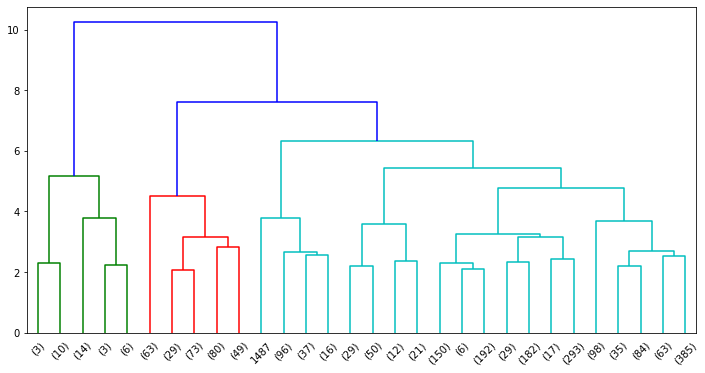

In [ ]:
plt.subplots(figsize=(12,6))
res = dendrogram(data_link, color_threshold=7.0, truncate_mode='lastp')

cmap = cm.magma(np.linspace(0, 5, 20))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

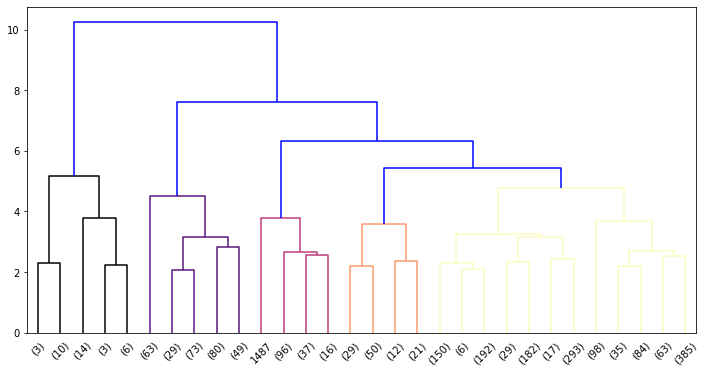

In [ ]:
plt.subplots(figsize=(12,6))
res5 = dendrogram(data_link, color_threshold=5.2, truncate_mode='lastp')

cmap = cm.magma(np.linspace(0, 2, 2))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

In [ ]:
hlabels = fcluster(data_link, t=1.2, criterion='distance')
silhouette_score(df_scal, hlabels)

0.3076760099371881

## Classificazione

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
y = df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(df_scal, y , test_size=0.3, random_state=1, stratify=y)

### Decision tree

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
clf_prova = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [ ]:
param_list = {'min_samples_split': [ 10, 20, 50, 70, 100, 150, 200],
              'min_samples_leaf': [ 5,10, 20, 50, 70, 100],
             },


grid_search = GridSearchCV(clf_prova, param_grid=param_list, scoring='accuracy',cv=5)
grid_search.fit(df_scal, y)
grid_search.best_estimator_

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=100)

In [ ]:
report(grid_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.867 (std: 0.082)
Parameters: {'min_samples_leaf': 5, 'min_samples_split': 100}

Model with rank: 2
Mean validation score: 0.865 (std: 0.080)
Parameters: {'min_samples_leaf': 5, 'min_samples_split': 70}

Model with rank: 3
Mean validation score: 0.863 (std: 0.083)
Parameters: {'min_samples_leaf': 10, 'min_samples_split': 100}



In [ ]:
param_list = {'max_depth': [None] + list(np.arange(2, 10)),
              'min_samples_split': np.arange(2,100,2),
              'min_samples_leaf': np.arange(2,100,2),
             }

random_search = RandomizedSearchCV(clf_prova, param_distributions=param_list, n_iter=100, cv=5)
random_search.fit(df_scal, y)
random_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, min_samples_split=66)

In [ ]:
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.883 (std: 0.088)
Parameters: {'min_samples_split': 66, 'min_samples_leaf': 30, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.883 (std: 0.088)
Parameters: {'min_samples_split': 62, 'min_samples_leaf': 6, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.882 (std: 0.087)
Parameters: {'min_samples_split': 48, 'min_samples_leaf': 22, 'max_depth': 3}



Scegliamo i parametri del rank 1

Model with rank: 1

Mean validation score: 0.883 (std: 0.088)

Parameters: {'min_samples_split': 56, 'min_samples_leaf': 30, 'max_depth': 3}

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3,  min_samples_split=56, min_samples_leaf=30)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred_tr = clf.predict(X_train)

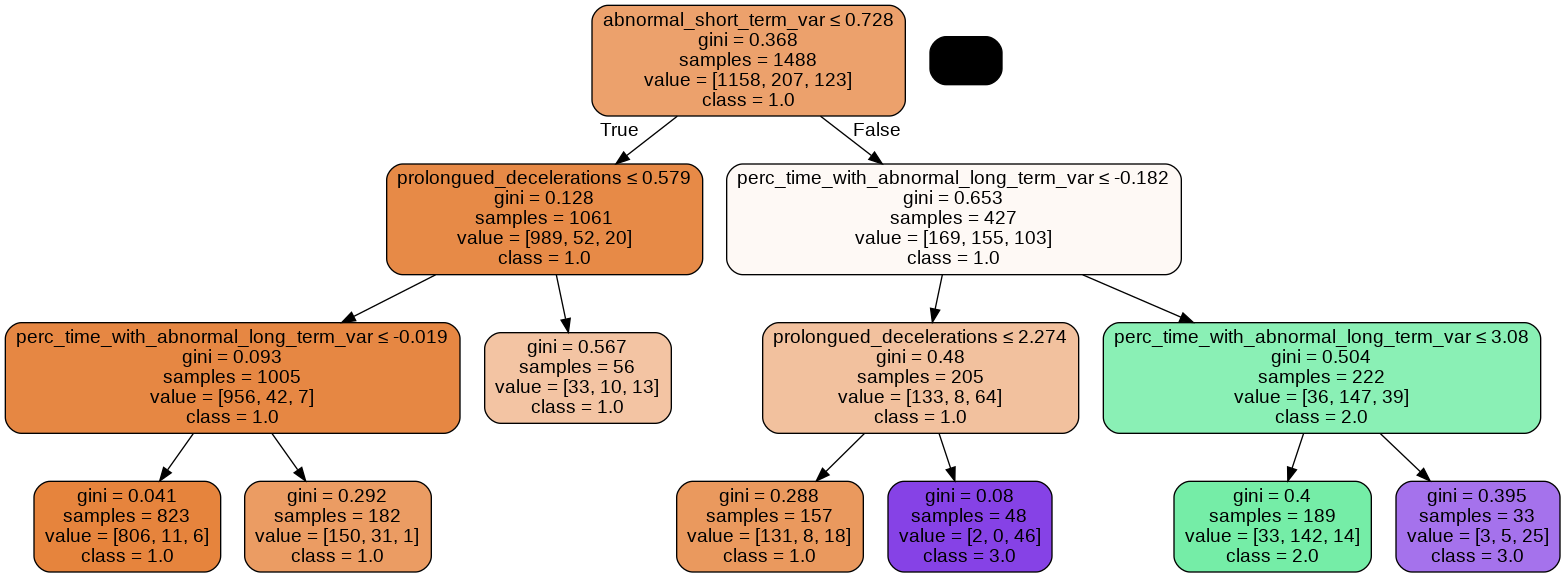

In [ ]:
attributes = ['accelerations','perc_time_with_abnormal_long_term_var','prolongued_decelerations','abnormal_short_term_var']

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
print('Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('F1-score %s' % f1_score(y_train, y_pred_tr, average=None))

Accuracy 0.8958333333333334
F1-score [0.94276094 0.71717172 0.69607843]


In [ ]:
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94      1158
         2.0       0.75      0.69      0.72       207
         3.0       0.88      0.58      0.70       123

    accuracy                           0.90      1488
   macro avg       0.85      0.74      0.79      1488
weighted avg       0.89      0.90      0.89      1488



In [ ]:
# TEST SET

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.8840125391849529
F1-score [0.93164063 0.64150943 0.77419355]
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.93       497
         2.0       0.72      0.58      0.64        88
         3.0       0.90      0.68      0.77        53

    accuracy                           0.88       638
   macro avg       0.84      0.74      0.78       638
weighted avg       0.88      0.88      0.88       638



array([[477,  18,   2],
       [ 35,  51,   2],
       [ 15,   2,  36]])

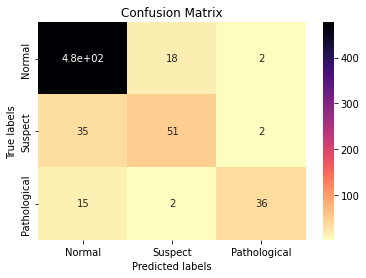

In [ ]:
ax= plt.subplot()
sb.heatmap(confusion_matrix(y_test, y_pred), cmap="magma_r",  ax = ax, annot=True)
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

[1.0, 2.0, 3.0]

[2 1 0]


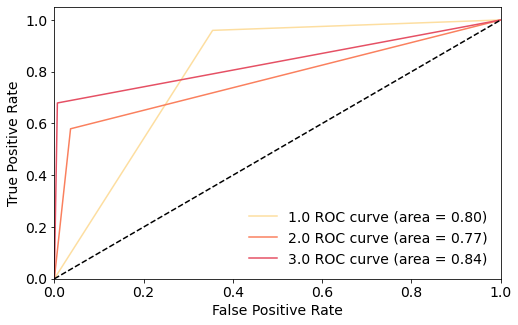

In [ ]:
# CURVA ROC

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

print(_)
colors = ['#fddea0', '#fa805e', '#e55064', '#912b81', '#120d31']

plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]), color=colors[i] )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [ ]:
scores = list()
for nbr_records in np.arange(20,len(X_train) + 20,20):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[:nbr_records], y_train[:nbr_records])
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

[]

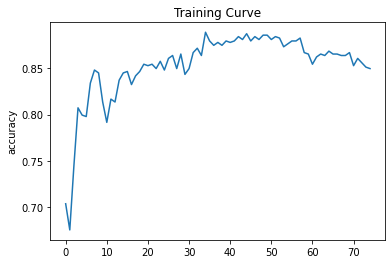

In [ ]:
plt.plot(scores)
plt.title('Training Curve')
plt.ylabel('accuracy')
plt.plot()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(3):
    fpr[i], tpr[i], _ = precision_recall_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

array([0.78801176, 0.73136364, 0.83709079])

In [ ]:
_

array([0.78801176, 0.73136364, 0.83709079])

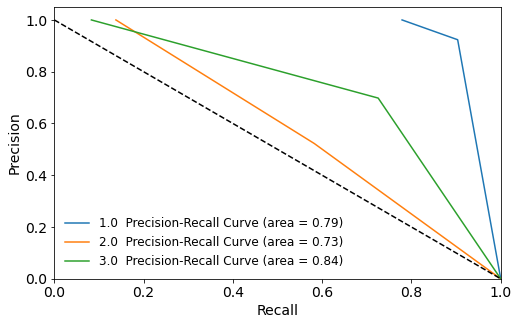

In [ ]:
plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='%s  Precision-Recall Curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc="lower left", fontsize=12, frameon=False)
plt.show()

# Random **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
param_list = {'max_depth': [None] + list(np.arange(2, 50)),
              'min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100, 150],
              'min_samples_leaf': [1, 5, 10, 15, 20, 30, 50, 100, 150],
              'criterion': ['gini', 'entropy'],
             }

clf_for_prova = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, class_weight=None)

random_search = RandomizedSearchCV(clf_for_prova, param_distributions=param_list, n_iter=100, cv=5)
random_search.fit(df_scal, y)
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.888 (std: 0.077)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 1, 'max_depth': 29, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.888 (std: 0.076)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 1, 'max_depth': 45, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.888 (std: 0.078)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}



In [ ]:
clf_for = random_search.best_estimator_

y_pred_for = clf_for.predict(X_test)
y_pred_for_tr = clf_for.predict(X_train)

In [ ]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_for_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_for_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred_for))
print('Test F1-score %s' % f1_score(y_test, y_pred_for, average=None))
print(classification_report(y_test, y_pred_for))
confusion_matrix(y_test, y_pred_for)

Train Accuracy 0.9227150537634409
Train F1-score [0.95500849 0.78125    0.83050847]

Test Accuracy 0.9122257053291536
Test F1-score [0.94549058 0.72839506 0.87619048]
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       497
         2.0       0.80      0.67      0.73        88
         3.0       0.88      0.87      0.88        53

    accuracy                           0.91       638
   macro avg       0.87      0.83      0.85       638
weighted avg       0.91      0.91      0.91       638



array([[477,  15,   5],
       [ 28,  59,   1],
       [  7,   0,  46]])

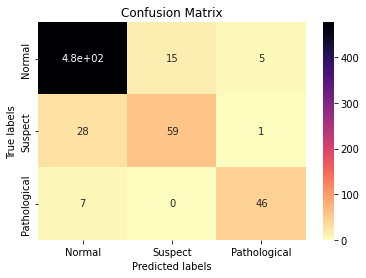

In [ ]:
ax= plt.subplot()
sb.heatmap(confusion_matrix(y_test, y_pred_for),cmap="magma_r",  ax = ax, annot=True)
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

[2 1 0]


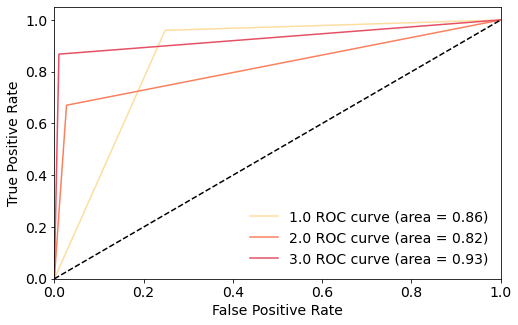

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred_for)
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

print(_)
colors = ['#fddea0', '#fa805e', '#e55064', '#912b81', '#120d31']

plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]), color=colors[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [ ]:
scores = cross_val_score(clf_for, df_scal, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_for, df_scal, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8908 (+/- 0.19)
F1-score: 0.8165 (+/- 0.26)


**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf_knn = KNeighborsClassifier()

knn_mod = clf_knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")

y_pred_knn = knn_mod.predict(X_test)

Baseline K-Nearest Neighbors: 0.893


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       497
         2.0       0.74      0.60      0.66        88
         3.0       0.79      0.77      0.78        53

    accuracy                           0.89       638
   macro avg       0.82      0.78      0.80       638
weighted avg       0.89      0.89      0.89       638



In [ ]:
print(confusion_matrix(y_test, y_pred_knn))

[[476  15   6]
 [ 30  53   5]
 [  8   4  41]]


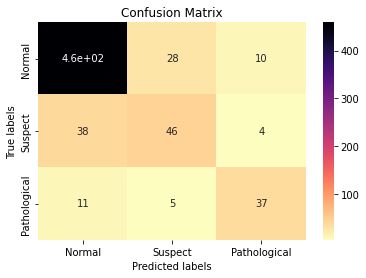

In [ ]:
ax= plt.subplot()
sb.heatmap(confusion_matrix(y_test, y_pred), cmap="magma_r",  ax = ax, annot=True)
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

[2 1 0]


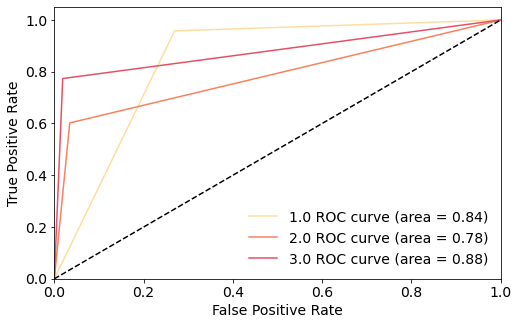

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred_knn)
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

print(_)
colors = ['#fddea0', '#fa805e', '#e55064', '#912b81', '#120d31']

plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]), color=colors[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

SUPPORT VECTOR MACHINES


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score

svc=SVC()
svc.fit(X_train,y_train)
y_pred_SVM =svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.9f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.849529781


In [ ]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       497
         2.0       0.61      0.52      0.56        88
         3.0       0.87      0.75      0.81        53

    accuracy                           0.87       638
   macro avg       0.80      0.74      0.77       638
weighted avg       0.87      0.87      0.87       638



In [ ]:
print(confusion_matrix(y_test, y_pred_SVM))

[[470  24   3]
 [ 39  46   3]
 [  8   5  40]]


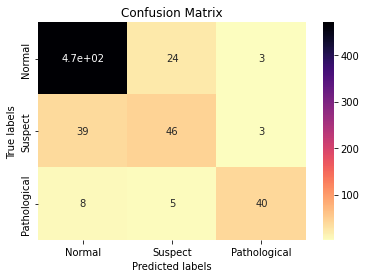

In [ ]:
ax= plt.subplot()
sb.heatmap(confusion_matrix(y_test, y_pred_SVM), cmap="magma_r",  ax = ax, annot=True)
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

[2 1 0]


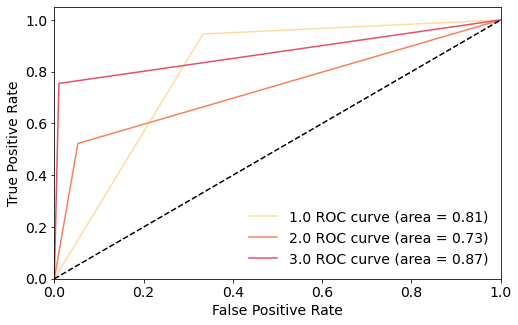

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred_SVM)
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

print(_)
colors = ['#fddea0', '#fa805e', '#e55064', '#912b81', '#120d31']

plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]), color=colors[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

MODEL SELECTION

In [ ]:
results = pd.DataFrame({
                        "Model": ["Decision Tree",
                                  "Random Forest",
                                  "KNN",
                                  "Support Vector Machine"],
                        "Score": [accuracy_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred_for),
                                  accuracy_score(y_test, y_pred_knn),
                                  accuracy_score(y_test,y_pred_SVM)
                                    ]
                        })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(5)

,Model
Score,
0.912226,Random Forest
0.893417,KNN
0.871473,Support Vector Machine
0.849530,Decision Tree


### PATTER MINING

In [ ]:
!pip install pyfim
from fim import apriori

     |████████████████████████████████| 357 kB 20.7 MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp37-cp37m-linux_x86_64.whl size=537762 sha256=1866dc1fd3f96fcee7fdc919c118a9dfcf250856d4dd11a35d7cab88695f9316
  Stored in directory: /root/.cache/pip/wheels/08/9f/26/09cb4efd027e46f96e0a0f33d0a74be614d3caf89c1eeb75a8
Successfully built pyfim


In [ ]:
columns = ['accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']
labelus = np.array(['Low', 'Medium', 'High'])

for col in columns:
  df[col+'Bin'] = pd.cut(df[col], 3, labels=labelus, duplicates='drop')


In [ ]:
df.drop(['baseline value','fetal_movement', 'uterine_contractions','mean_value_of_short_term_variability', 'light_decelerations', 'severe_decelerations', 'accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations',
         'prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability',
         'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min' , 'mean_value_of_long_term_variability', 'histogram_max' , 'histogram_number_of_peaks' , 'histogram_number_of_zeroes',
         'histogram_mode', 'histogram_mean' , 'histogram_median' , 'histogram_variance' , 'histogram_tendency' , 'kmeans5_labels','kmeans3_labels' ], axis=1, inplace=True)

In [ ]:
df

,fetal_health,accelerationsBin,prolongued_decelerationsBin,abnormal_short_term_variabilityBin,percentage_of_time_with_abnormal_long_term_variabilityBin
0,2.0,Low,Low,High,Medium
1,1.0,Low,Low,Low,Low
2,1.0,Low,Low,Low,Low
3,1.0,Low,Low,Low,Low
4,1.0,Medium,Low,Low,Low
...,...,...,...,...,...
2121,2.0,Low,Low,High,Low
2122,2.0,Low,Low,High,Low
2123,2.0,Low,Low,High,Low
2124,2.0,Low,Low,High,Low


In [ ]:
for col in columns:
  df[col+'Bin'] = df[col+'Bin'].astype(str) + '_'+col

In [ ]:
df.head()

,fetal_health,accelerationsBin,prolongued_decelerationsBin,abnormal_short_term_variabilityBin,percentage_of_time_with_abnormal_long_term_variabilityBin
0,2.0,Low_accelerations,Low_prolongued_decelerations,High_abnormal_short_term_variability,Medium_percentage_of_time_with_abnormal_long_t...
1,1.0,Low_accelerations,Low_prolongued_decelerations,Low_abnormal_short_term_variability,Low_percentage_of_time_with_abnormal_long_term...
2,1.0,Low_accelerations,Low_prolongued_decelerations,Low_abnormal_short_term_variability,Low_percentage_of_time_with_abnormal_long_term...
3,1.0,Low_accelerations,Low_prolongued_decelerations,Low_abnormal_short_term_variability,Low_percentage_of_time_with_abnormal_long_term...
4,1.0,Medium_accelerations,Low_prolongued_decelerations,Low_abnormal_short_term_variability,Low_percentage_of_time_with_abnormal_long_term...


In [ ]:
X = df.values.tolist()

In [ ]:
X[0]

[2.0,
 'Low_accelerations',
 'Low_prolongued_decelerations',
 'High_abnormal_short_term_variability',
 'Medium_percentage_of_time_with_abnormal_long_term_variability']

In [ ]:
itemsets = apriori(X, target='s', supp=1, zmin=3, report='S')

In [ ]:
itemsets[:5]

[(('High_accelerations',
   1.0,
   'Low_percentage_of_time_with_abnormal_long_term_variability'),
  3.057384760112888),
 (('High_accelerations',
   'Low_abnormal_short_term_variability',
   1.0,
   'Low_percentage_of_time_with_abnormal_long_term_variability'),
  1.5051740357478833),
 (('High_accelerations', 'Low_abnormal_short_term_variability', 1.0),
  1.5051740357478833),
 (('High_accelerations',
   'Low_abnormal_short_term_variability',
   'Low_percentage_of_time_with_abnormal_long_term_variability'),
  1.5051740357478833),
 (('High_accelerations',
   'Low_abnormal_short_term_variability',
   'Low_prolongued_decelerations',
   1.0,
   'Low_percentage_of_time_with_abnormal_long_term_variability'),
  1.458137347130762)]

In [ ]:
itemsets_massimale = apriori(X, target='m', supp=2, zmin=3, report='S')

In [ ]:
itemsets_massimale[:5]

[(('High_accelerations',
   1.0,
   'Low_percentage_of_time_with_abnormal_long_term_variability',
   'Low_prolongued_decelerations'),
  3.0103480714957667),
 (('High_percentage_of_time_with_abnormal_long_term_variability',
   3.0,
   'Low_accelerations',
   'Low_prolongued_decelerations'),
  2.116650987770461),
 (('High_percentage_of_time_with_abnormal_long_term_variability',
   'High_abnormal_short_term_variability',
   'Low_accelerations',
   'Low_prolongued_decelerations'),
  2.916274694261524),
 (('Medium_prolongued_decelerations',
   3.0,
   'Low_accelerations',
   'Low_percentage_of_time_with_abnormal_long_term_variability'),
  3.339604891815616),
 ((3.0,
   'High_abnormal_short_term_variability',
   'Low_accelerations',
   'Low_percentage_of_time_with_abnormal_long_term_variability'),
  2.916274694261524)]

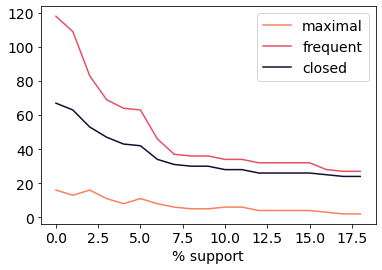

In [ ]:
len_max_it = []
len_s_it = []
len_c_it = []

for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    s_itemsets = apriori(X, target='s', supp=i, zmin=3)
    c_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_s_it.append( len(s_itemsets) )
    len_c_it.append( len(c_itemsets) )

plt.subplots(figsize=(6,4))

# colors = ['#fddea0', '#fa805e', '#e55064', '#912b81', '#120d31']

plt.plot(len_max_it, label='maximal', color= '#fa805e')
plt.plot(len_s_it, label='frequent', color= '#e55064')
plt.plot(len_c_it, label='closed', color='#120d31')

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('% support', fontsize=14)

plt.show()

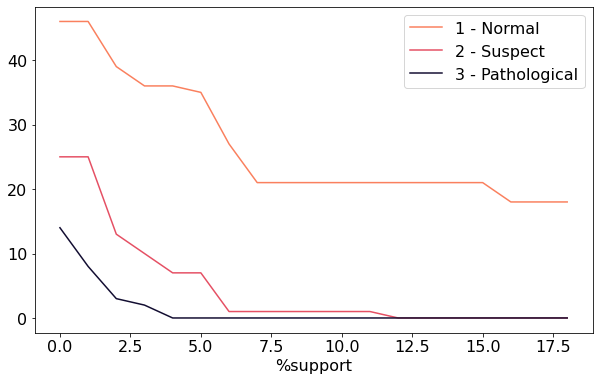

In [ ]:
filter_1 = []
filter_2 = []
filter_3 = []

for i in range(2, 20+1):
    max_itemsets = apriori(X, target='s', supp=i, zmin=3)

    filter_1.append( len([item for item in max_itemsets if 1.0 in item[0]]) )
    filter_2.append( len([item for item in max_itemsets if 2.0 in item[0]]) )
    filter_3.append( len([item for item in max_itemsets if 3.0 in item[0]]) )


plt.figure(figsize=(10, 6))
plt.plot(filter_1, label='1 - Normal', color= '#fa805e')
plt.plot(filter_2, label='2 - Suspect',  color= '#e55064')
plt.plot(filter_3, label='3 - Pathological', color='#120d31')
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('%support', fontsize=16)

plt.show()

In [ ]:
rules = apriori(X, target='r', supp=2, zmin=3, conf=60, report='aScl')

In [ ]:
rules[:100]

[('Low_prolongued_decelerations',
  ('High_accelerations',
   1.0,
   'Low_percentage_of_time_with_abnormal_long_term_variability'),
  64,
  3.0103480714957667,
  0.9846153846153847,
  1.0373103606007472),
 ('Low_percentage_of_time_with_abnormal_long_term_variability',
  ('High_accelerations', 1.0, 'Low_prolongued_decelerations'),
  64,
  3.0103480714957667,
  1.0,
  1.1541802388707927),
 (1.0,
  ('High_accelerations',
   'Low_percentage_of_time_with_abnormal_long_term_variability',
   'Low_prolongued_decelerations'),
  64,
  3.0103480714957667,
  1.0,
  1.2845921450151057),
 ('Low_percentage_of_time_with_abnormal_long_term_variability',
  ('High_accelerations', 1.0),
  65,
  3.057384760112888,
  1.0,
  1.1541802388707927),
 (1.0,
  ('High_accelerations',
   'Low_percentage_of_time_with_abnormal_long_term_variability'),
  65,
  3.057384760112888,
  1.0,
  1.2845921450151057),
 ('Low_prolongued_decelerations',
  ('High_accelerations', 1.0),
  64,
  3.0103480714957667,
  0.98461538461538

In [ ]:
len_r = []
for i in range(1, 20+1): #support
    len_r_wrt_i = []
    for j in range(60, 80+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')

        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here

    len_r.append(len_r_wrt_i)

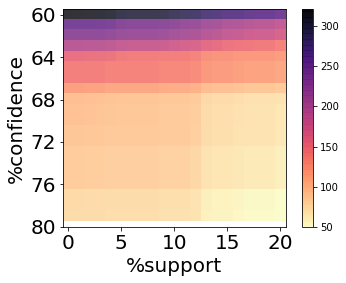

In [ ]:
plt.imshow( len_r, cmap='magma_r', alpha=0.8 )
plt.xlabel('%support', fontsize=20)
plt.ylabel('%confidence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()